<a href="https://colab.research.google.com/github/Gottdata/stock-prices-model/blob/main/Stock_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First steps

### csv file upload


 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Acciones financieras.csv', delimiter=';')

In this section, we will adjust the format, rearrange rows and columns, and handle missing data before performing the EDA.

In [ ]:
# Removal of columns that are not of interest
data = data1.drop(columns=['ENPH_Adj_Close', 'ENPH_Adj_Close.1', 'ENPH_Adj_Close.2', 'ENPH_Adj_Close.3', 'ENPH_Adj_Close.4', 'ENPH_Adj_Close.5', 'ENPH_Adj_Close.6', 'ENPH_Adj_Close.7', 'ENPH_Adj_Close.8', 'ENPH_Adj_Close.9', 'ENPH_Volume', 'ENPH_Volume.1', 'ENPH_Volume.2', 'ENPH_Volume.3', 'ENPH_Volume.4', 'ENPH_Volume.5', 'ENPH_Volume.6', 'ENPH_Volume.7', 'ENPH_Volume.8', 'ENPH_Volume.9',],)

# Remove the first row corresponding to the date 28.09.2020 as it contains null values.
data = data.drop(index=0)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Define the 'Date' column as the index to properly work with time series
data.set_index('Date', inplace=True)

# Verify the changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-09-29 00:00:00+00:00 to 2024-09-25 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ('INTC_Daily_Return', '')   1004 non-null   float64
 1   ('MSFT_Daily_Return', '')   1004 non-null   float64
 2   ('GOOGL_Daily_Return', '')  1004 non-null   float64
 3   ('AMZN_Daily_Return', '')   1004 non-null   float64
 4   ('GT_Daily_Return', '')     1004 non-null   float64
 5   ('SNOW_Daily_Return', '')   1004 non-null   float64
 6   ('OXY_Daily_Return', '')    1004 non-null   float64
 7   ('TSLA_Daily_Return', '')   1004 non-null   float64
 8   ('ABNB_Daily_Return', '')   952 non-null    float64
 9   ('ENPH_Daily_Return', '')   1004 non-null   float64
dtypes: float64(10)
memory usage: 86.3 KB
None


### Context
In this project, we will implement an ARIMA model for machine learning, which is particularly useful for time series analysis, such as daily stock returns.

The model will be applied to Google's stock, as it is a company with high trading volume and a long market history.

The main objective is to predict future returns, analyze trends, and detect anomalies.


# Exploration and Visualization (EDA): Understanding the Dataset

### Initial exploration
The dataset contains information on the daily returns of various stocks. In our case, we will focus on GOOGL, covering the dataset's time range from late September 2020 to late September 2024, with a total of 1,004 entries.


In [ ]:
data.head()
#data.tail()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')"
Date,,,,,,,,,,
2020-09-29 00:00:00+00:00,-0.00,-0.01,0.01,-0.01,-0.01,0.03,-0.03,-0.01,NaN,0.03
2020-09-30 00:00:00+00:00,0.01,0.01,-0.00,0.00,0.01,-0.03,0.00,0.02,NaN,0.02
2020-10-01 00:00:00+00:00,0.01,0.01,0.02,0.02,0.08,-0.03,-0.03,0.04,NaN,0.08
2020-10-02 00:00:00+00:00,-0.02,-0.03,-0.02,-0.03,0.00,-0.07,0.02,-0.07,NaN,0.01
2020-10-05 00:00:00+00:00,0.01,0.02,0.02,0.02,0.06,0.06,0.06,0.03,NaN,0.08


In [ ]:
data.info()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-09-29 00:00:00+00:00 to 2024-09-25 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ('INTC_Daily_Return', '')   1004 non-null   float64
 1   ('MSFT_Daily_Return', '')   1004 non-null   float64
 2   ('GOOGL_Daily_Return', '')  1004 non-null   float64
 3   ('AMZN_Daily_Return', '')   1004 non-null   float64
 4   ('GT_Daily_Return', '')     1004 non-null   float64
 5   ('SNOW_Daily_Return', '')   1004 non-null   float64
 6   ('OXY_Daily_Return', '')    1004 non-null   float64
 7   ('TSLA_Daily_Return', '')   1004 non-null   float64
 8   ('ABNB_Daily_Return', '')   952 non-null    float64
 9   ('ENPH_Daily_Return', '')   1004 non-null   float64
dtypes: float64(10)
memory usage: 86.3 KB
Index(['('INTC_Daily_Return', '')', '('MSFT_Daily_Return', '')',
       '('GOOGL_Daily_Return', '')', '('AMZN_Daily_Ret

For this project, we will use the #0 "Date" column for temporal identification and #23 ('GOOGL_Daily_Return', '') for the daily return values of Google's stock.

Regarding our numeric variable of interest, we observe 1,004 non-null observations, indicating that there is no apparent presence of missing or incomplete values.

###  Statistical Exploration of Daily Returns

The mean is 0.1%, indicating that Google's stock is relatively stable over time.

Its standard deviation is 2%, which suggests low volatility—although relatively high in comparison to other asset classes, which is characteristic of equity markets.

In [ ]:
data.describe()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')"
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000,1004.000000,952.000000,1004.000000
mean,-0.000369,0.000847,0.001106,0.000408,0.000618,0.00004,0.002231,0.001345,0.000326,0.001335
std,0.025228,0.016856,0.019680,0.022596,0.033078,0.03922,0.030633,0.037035,0.031560,0.041930
min,-0.260000,-0.080000,-0.100000,-0.140000,-0.270000,-0.18000,-0.110000,-0.120000,-0.130000,-0.260000
25%,-0.010000,-0.010000,-0.010000,-0.010000,-0.020000,-0.02000,-0.010000,-0.020000,-0.020000,-0.020000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,0.010000,0.020000,0.02000,0.020000,0.020000,0.020000,0.020000
max,0.110000,0.080000,0.100000,0.140000,0.210000,0.23000,0.220000,0.200000,0.130000,0.250000


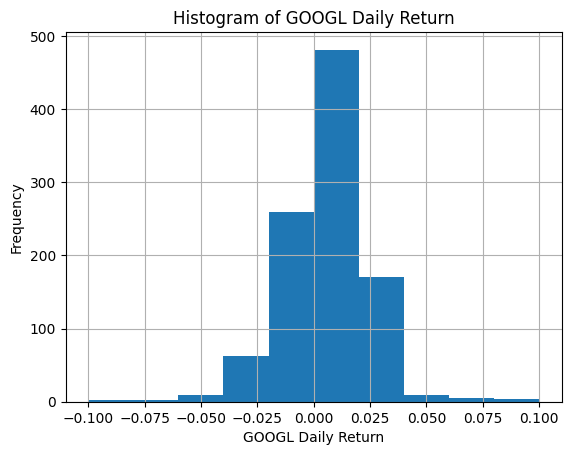

Median: 0.0
Mean: 0.0011055776892430278
Pearson s coef : 0.700755857607852


In [ ]:
# Histogram of the variable 'GOOGL_Daily_Return'
data["('GOOGL_Daily_Return', '')"].hist()
plt.title("Histogram of GOOGL Daily Return")
plt.xlabel("GOOGL Daily Return")
plt.ylabel("Frequency")
plt.show()

# Calculate median
median = data["('GOOGL_Daily_Return', '')"].median()
print(f"Median: {median}")

# Calculate mean
mean = data["('GOOGL_Daily_Return', '')"].mean()
print(f"Mean: {mean}")

# Calculate Pearson s coef btw GOOGL and MSFT Daily Returns
correlacion_pearson = data["('GOOGL_Daily_Return', '')"].corr(data["('MSFT_Daily_Return', '')"], method='pearson')

print(f"Pearson s coef : {correlacion_pearson}")

The distribution is positively skewed, meaning there is a higher frequency of returns below the mean.
Since it has a positive skewness, the mean is greater than the median and the mode

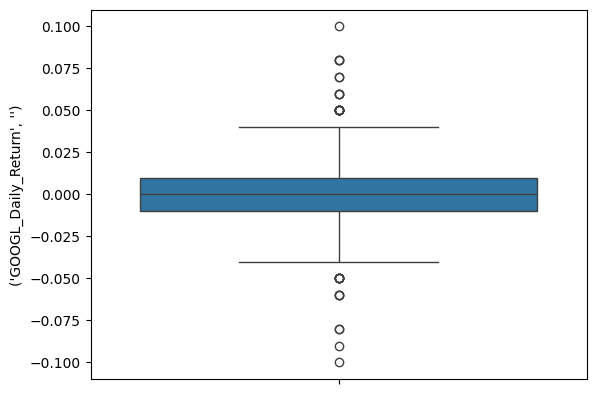

In [ ]:
# Create a boxplot for column ('GOOGL_Daily_Return', '')
sns.boxplot(data=data["('GOOGL_Daily_Return', '')"])

# Mostrar el gráfico
plt.show()

In [ ]:
data = data.reset_index()

In [ ]:
# Create a column 'Year' from column 'Date'
data['Year'] = data['Date'].dt.year

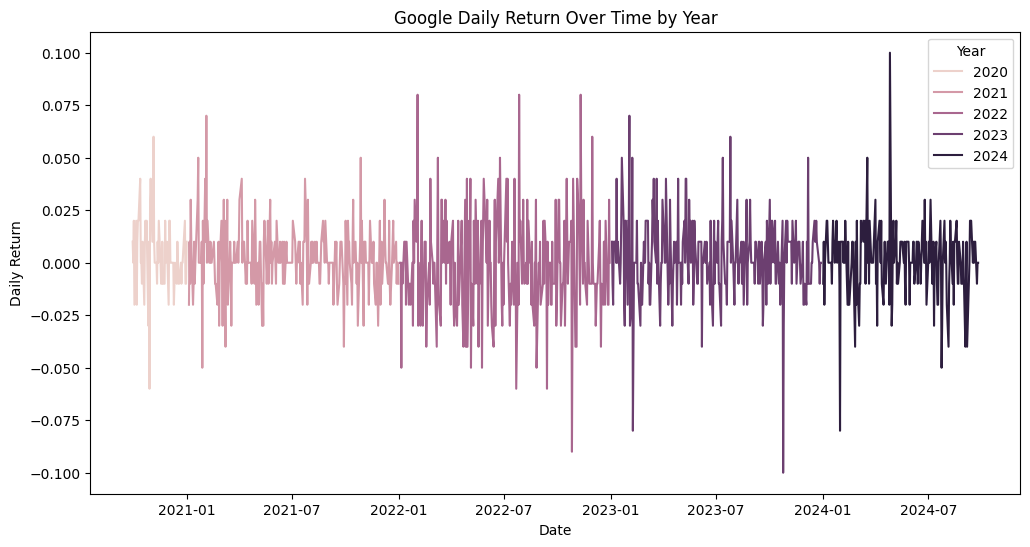

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a graph of Google daily return over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y="('GOOGL_Daily_Return', '')", hue='Year', data=data)

# Labels
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Google Daily Return Over Time by Year')

# Show graph
plt.show()

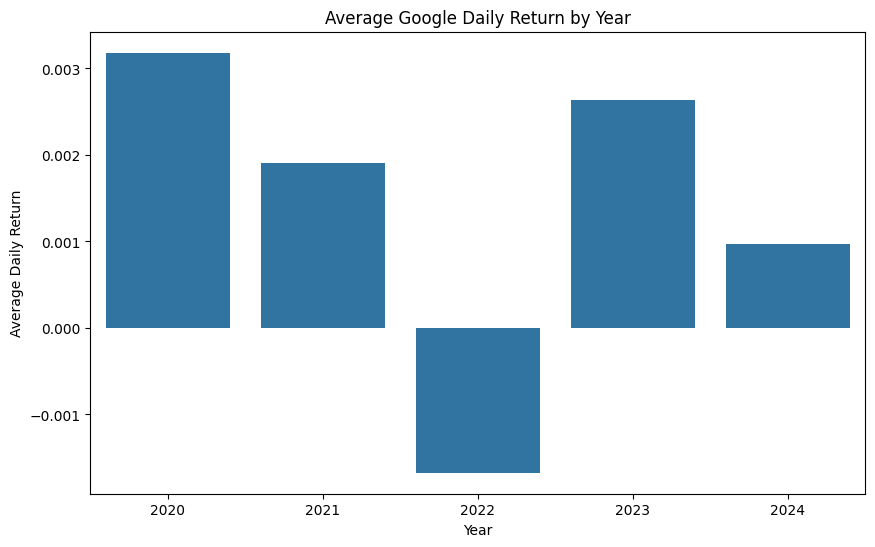

In [ ]:
# Calculate the average daily return per year
annual_avg = data.groupby('Year')["('GOOGL_Daily_Return', '')"].mean().reset_index()

# Create a bar chart to show the average daily returns per year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y="('GOOGL_Daily_Return', '')", data=annual_avg)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Daily Return')
plt.title('Average Google Daily Return by Year')

# Show graph
plt.show()


###  Conclusion after EDA

rom the initial exploration, data organization, and cleaning, we have concluded:

* The historical series of Google's daily returns will be used as the basis for the Machine Learning model.
* Based on the descriptive analysis, there are no significant obstacles to using the cleaned dataset (asymmetric distribution but generally normal behavior).
* A time-series-based model, such as ARIMA, will be applied.
Initially, all historical values will be considered (excluding NaN values), including outliers, as they are part of market cycles.
* Although in 2022, the average returns were negative, in contrast to the other periods, and 2020 showed higher volatility (likely due to COVID), we have decided to consider all five periods to capture trends and ensure complete information over the years.




# ARIMA Model for Daily Returns




### Split of the Dataset into Training and Test Sets

In [ ]:
# orden data by date
data.sort_index(inplace=True)

# Split of dataset btw train y test
train_size = int(len(data) * 0.8)  # 80% of data to train
train, test = data.iloc[:train_size], data.iloc[train_size:]

test.tail()
train.describe()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')",Year
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,751.000000,803.000000,803.000000
mean,0.000075,0.000785,0.001046,0.000050,0.001333,0.000585,0.002765,0.001445,0.000386,0.001357,2021.813200
std,0.022884,0.017852,0.020178,0.023724,0.034473,0.041446,0.033564,0.037389,0.033854,0.042474,0.948802
min,-0.120000,-0.080000,-0.100000,-0.140000,-0.270000,-0.170000,-0.110000,-0.120000,-0.130000,-0.260000,2020.000000
25%,-0.010000,-0.010000,-0.010000,-0.010000,-0.020000,-0.020000,-0.020000,-0.020000,-0.020000,-0.020000,2021.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000
75%,0.010000,0.010000,0.010000,0.010000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2023.000000
max,0.110000,0.080000,0.080000,0.140000,0.210000,0.230000,0.220000,0.200000,0.130000,0.250000,2023.000000


### Identify parameters of ARIMA model (p, d, q)

The ARIMA model has three components:

p: Number of lags in the autoregressive (AR) part.
d: Number of differences needed to make the series stationary.
q: Number of lags in the moving average (MA) part.



*Integratopn order d*



In [ ]:
# Integration order  adf
from statsmodels.tsa.stattools import adfuller

# Apply ADF test to daily returns
adf_result = adfuller(train["('GOOGL_Daily_Return', '')"],
                  autolag='BIC')

# Print ADF results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -28.699691593788017
p-value: 0.0


The p-value is less than 0.05, which indicates that the series is stationary. Therefore, differentiation is not required, **meaning that the parameter d = 0.**

This result is consistent with the properties of daily returns in financial time series, unlike prices, which are usually non-stationary. This supports the choice of daily returns instead of prices for implementing the ARIMA model.

*p and q parameter identification*

To determine these parameters, we use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to identify initial values.

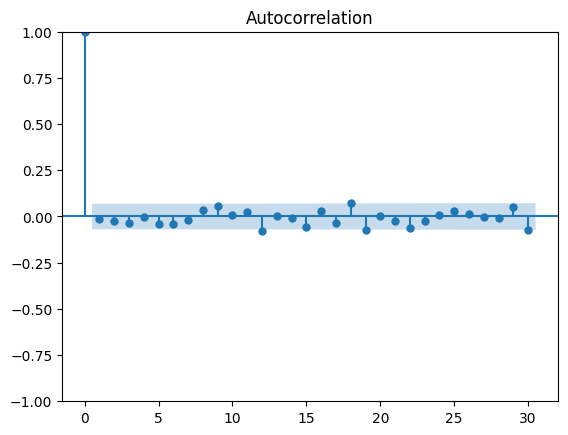

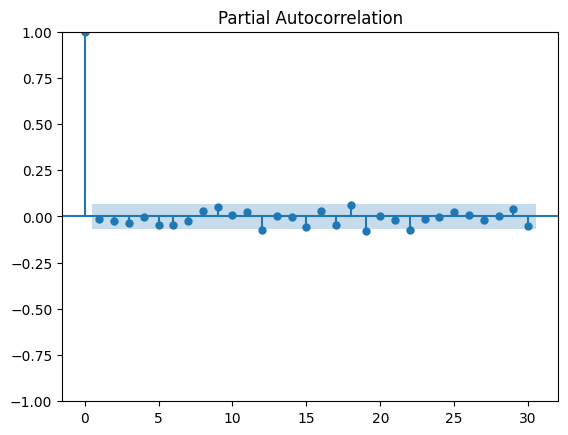

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graph ACF y PACF
plot_acf(train["('GOOGL_Daily_Return', '')"])
plot_pacf(train["('GOOGL_Daily_Return', '')"])
plt.show()

The ACF plot shows the correlation between the time series and its lags. In this case, **q = 1.**

The PACF plot shows the correlation between the series and its lags, eliminating the influence of intermediate values. In this case, **p = 1.**



```
# This is formatted as code
```

We conclude that the model is  **ARIMA(1,0,1)**

### Fitting the ARIMA Model

In [ ]:
#  Fitting the ARIMA Model
model = ARIMA(train["('GOOGL_Daily_Return', '')"], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                   SARIMAX Results                                    
Dep. Variable:     ('GOOGL_Daily_Return', '')   No. Observations:                  803
Model:                         ARIMA(1, 0, 1)   Log Likelihood                1995.438
Date:                        Thu, 13 Mar 2025   AIC                          -3982.875
Time:                                10:51:15   BIC                          -3964.122
Sample:                                     0   HQIC                         -3975.672
                                        - 803                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.483      0.138      -0.000       0.002
ar.L1         -0.0075      2.240     -0.003      0.997      -4.397 

If we observe the model results using the selected parameters, the model does not perform correctly due to the significance of the parameter statistics. However, we will proceed with the prediction steps for the test set.

### Predictions on the Test Set

In [ ]:
# Predictions on test set
predictions = model_fit.forecast(steps=len(test["('GOOGL_Daily_Return', '')"]))

# Assessing Model Accuracy
rmse = np.sqrt(mean_squared_error(test["('GOOGL_Daily_Return', '')"], predictions))
print(f'RMSE: {rmse}')

RMSE: 0.017554404855944544


If we compare the mean of our variable (0.1%) with the RMSE (1.8%), we conclude that the model is not acceptable.

Comparison of Predicted vs. Actual Values

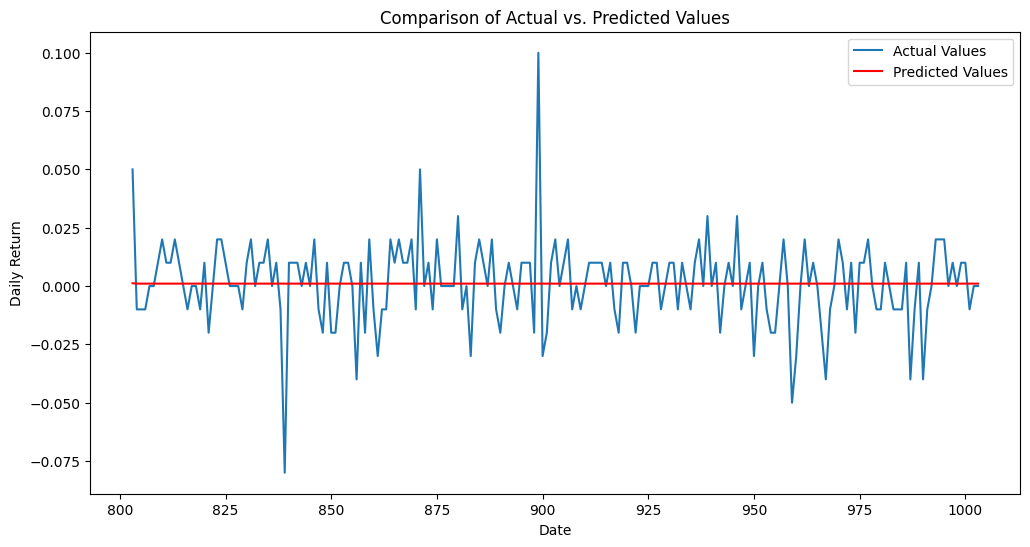

In [36]:
# Graph / Actual vs predicted values

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["('GOOGL_Daily_Return', '')"], label='Actual Values')
plt.plot(test.index, predictions, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()
plt.show()


The predicted values are almost constant.


### Outliers

Outlier Detection Using Standard Deviation

In [37]:
# Define threshold for standard deviations (adjustable)
threshold = 3  # 3 standard deviations

# Get mean and standard deviation of daily returns
mean = train["('GOOGL_Daily_Return', '')"].mean()
std = train["('GOOGL_Daily_Return', '')"].std()

# Identify outliers (beyond 3 standard deviations)
outliers = (train["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
           (train["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

# Print the number of detected outliers
print(f'Detected outliers: {outliers.sum()}')

Detected outliers: 11


In [38]:
# Filter out the data that are NOT outliers
returns_no_outliers = train["('GOOGL_Daily_Return', '')"][~outliers]

# Check how many data points remain after removing outliers
print(f'Remaining data after removing outliers: {len(returns_no_outliers)}')

Remaining data after removing outliers: 792


ARIMA model wo outliers

In [39]:
# Apply the outlier filter to both train and test sets
outliers_train = (train["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
                 (train["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

outliers_test = (test["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
                (test["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

# Filter out the outliers from train and test sets
train_no_outliers = train["('GOOGL_Daily_Return', '')"][~outliers_train]
test_no_outliers = test["('GOOGL_Daily_Return', '')"][~outliers_test]

train_no_outliers.describe()

,"('GOOGL_Daily_Return', '')"
count,792.000000
mean,0.001149
std,0.018202
min,-0.050000
25%,-0.010000
50%,-0.000000
75%,0.010000
max,0.060000


In [40]:
# ARIMA model fit, data wo outliers
model_no_outliers = ARIMA(train_no_outliers, order=(1, 0, 1))
model_fit_no_outliers = model_no_outliers.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [41]:
# Predictions of the model wo outliers
predictions_no_outliers = model_fit_no_outliers.forecast(steps=len(test_no_outliers))
predictions_no_outliers.index = test_no_outliers.index


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


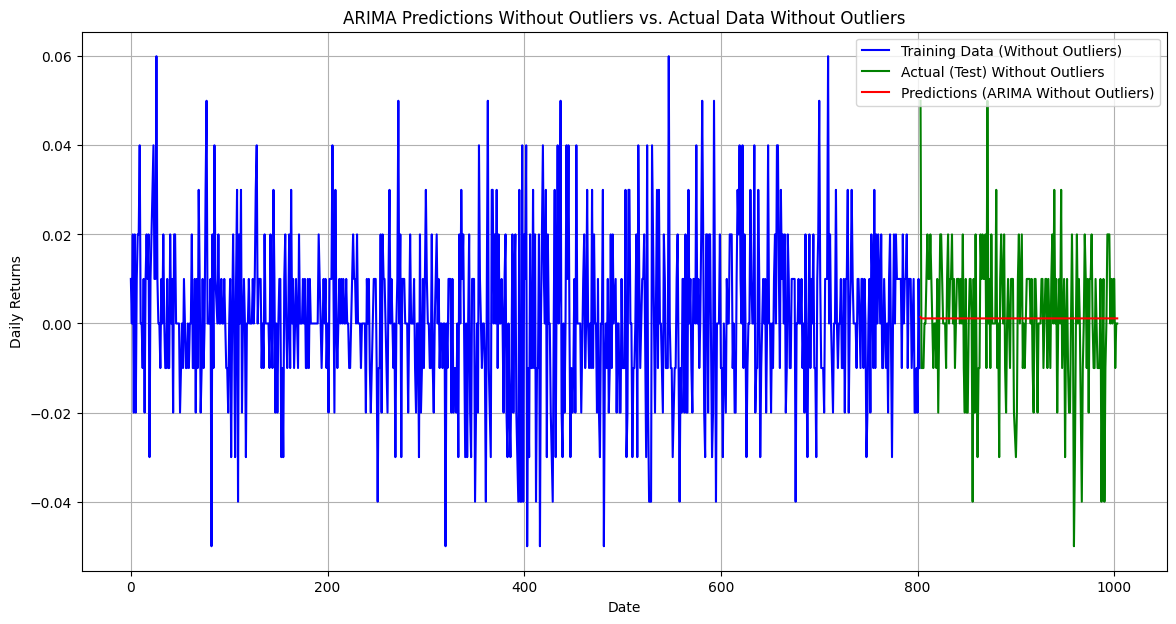

In [42]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(14, 7))

# Plot the actual training data without outliers
plt.plot(train_no_outliers.index, train_no_outliers, label='Training Data (Without Outliers)', color='blue')

# Plot the actual test data without outliers
plt.plot(test_no_outliers.index, test_no_outliers, label='Actual (Test) Without Outliers', color='green')

# Plot the predictions
plt.plot(predictions_no_outliers.index, predictions_no_outliers, label='Predictions (ARIMA Without Outliers)', color='red')

# Add title and labels
plt.title('ARIMA Predictions Without Outliers vs. Actual Data Without Outliers')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()

# Show the plot
plt.grid()
plt.show()


As a conclusion of applying the ARIMA (1,0,1) model to Google's daily stock returns, we obtain a model that does not perform well, even after excluding outliers. This is likely due to the series having values very close to zero.

One possible alternative would be to transform the series using logarithms, but this is not feasible since we have negative values.

Next, we will replicate the model on the price series.

# **Modelo ARIMA de los precios**

### Preparacion y limpieza de los datos con Yahoo Finance, Decomposicion de la serie temporal (EDA)

Los datos son extraidos de Yahoo Finance

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Definir el ticker del activo (por ejemplo, GOOGL para Google)
ticker = 'GOOGL'

# Descargar los datos del activo desde Yahoo Finance
precios_googl = yf.download(ticker, start='2021-07-01', end='2024-09-30')

# Mostrar los precios ajustados de cierre (Adj Close)
adj_close = precios_googl['Adj Close']

# Obtener el precio máximo y mínimo
precio_maximo = adj_close.max()
precio_minimo = adj_close.min()

# Mostrar los resultados
print(f'Precio máximo de Adj Close: {precio_maximo}')
print(f'Precio mínimo de Adj Close: {precio_minimo}')


[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

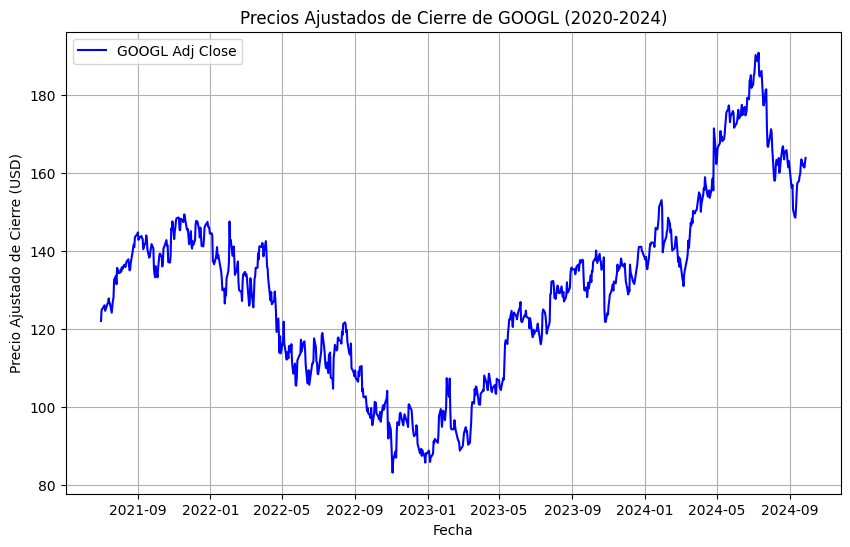

In [ ]:
import matplotlib.pyplot as plt

# Graficar los precios ajustados de cierre
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(adj_close, label='GOOGL Adj Close', color='blue')

# Añadir título y etiquetas
plt.title('Precios Ajustados de Cierre de GOOGL (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado de Cierre (USD)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

En el grafico podemos ver los precios de la accion de Google desde Julio de 2021 hasta septiembre de 2024. POdemos ver que hasta principios de enero de 2023 los preiocs tuvieron una tendencia mas bien bajista, probablemente debido a las consecuencias de la recision por el covid a nivel mundial y luego una tendencia alcista hasta la fecha, donde hubo una baja significativa. Seria un bueno goal evaluar si el precio continuaria una senda alcista o bajista.

DETECCION Y ELIMINACION DE DATOS NULOS

In [ ]:
print(adj_close.isnull().sum())  # Para mostrar el número de NaN en cada columna
print(adj_close[adj_close.isnull()])  # Para mostrar las filas que aún contienen NaN


0
Series([], Name: Adj Close, dtype: float64)


In [ ]:
adj_close = adj_close.dropna()


In [ ]:
print(adj_close.isnull().sum())  # Para mostrar el número de NaN en cada columna
print(adj_close[adj_close.isnull()])  # Para mostrar las filas que aún contienen NaN

0
Series([], Name: Adj Close, dtype: float64)


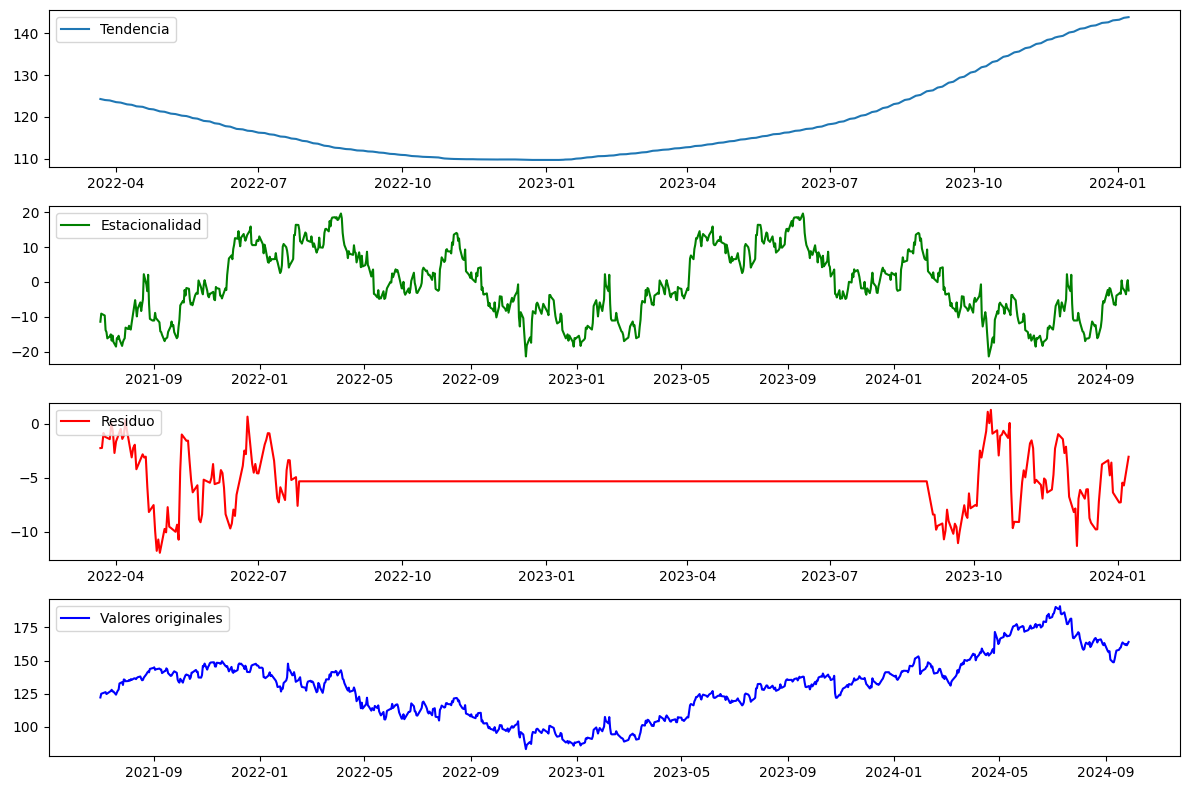

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegúrate de que adj_close es tu DataFrame ya cargado y configurado
# adj_close = pd.DataFrame(...)  # Carga tus datos aquí

# Asegurarte de que los datos son de frecuencia diaria
adj_close = adj_close.asfreq('D')

# Eliminar valores nulos (si aún hay, esto es redundante si ya lo hiciste antes)
adj_close = adj_close.dropna()

# Asegúrate de que adj_close sea una serie unidimensional
if isinstance(adj_close, pd.DataFrame):
    adj_close = adj_close.iloc[:, 0]  # Selecciona la primera columna

# Aplicar la descomposición
decompose_result = seasonal_decompose(adj_close, model='additive', period=365)

# Graficar los resultados de la descomposición
plt.figure(figsize=(12, 8))

# Graficar la tendencia
plt.subplot(411)
plt.plot(decompose_result.trend, label='Tendencia')
plt.legend(loc='upper left')

# Graficar la estacionalidad
plt.subplot(412)
plt.plot(decompose_result.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

# Graficar el residuo
plt.subplot(413)
plt.plot(decompose_result.resid, label='Residuo', color='red')
plt.legend(loc='upper left')

# Graficar los valores originales
plt.subplot(414)
plt.plot(adj_close, label='Valores originales', color='blue')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Descomponiendo la serie temporal podemos ver que desde enero 2023, la serie compienza una tendencia alcista. La estacionalidad es constante y se mantiene en el tiempo. Los residuos no muestran una gran varicaicon y hay unn periodo que es constante, lo cual habria que investigar


### Division del set de entrenamiento y test

In [ ]:
# ordenamos los datos por fecha
adj_close.sort_index(inplace=True)

# Dividimos el dataset en train y test
train_size = int(len(adj_close) * 0.8)  # Usa el 80% de los datos para entrenar
train, test = adj_close.iloc[:train_size], adj_close.iloc[train_size:]

print(test.tail())
print(train.tail())


Date
2024-09-23    161.850006
2024-09-24    162.289993
2024-09-25    161.490005
2024-09-26    162.729996
2024-09-27    163.949997
Name: Adj Close, dtype: float64
Date
2024-01-29    153.130814
2024-01-30    151.085892
2024-01-31    139.753952
2024-02-01    140.811340
2024-02-02    142.028320
Name: Adj Close, dtype: float64


### Identificar los parámetros del modelo ARIMA (p, d, q)

El modelo ARIMA tiene tres componentes:

p: número de rezagos (lags) de la parte autoregresiva.
d: número de diferencias necesarias para hacer la serie estacionaria.
q: número de rezagos en la parte de media móvil.



*Identificaicon del parametro d*


In [ ]:
#Orden de integracioin adf
from statsmodels.tsa.stattools import adfuller

# Aplicar el test ADF a la columna de retornos
adf_result = adfuller(train,
                  autolag='BIC')

# Imprimir los resultados de ADF
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -1.5625493904316816
p-value: 0.5023738325601654


Dado que el p-value es alto, mayor al nivel de significancia del 5%. Debemos diferenciar para ver si obtenemos un serie estacionaria.

In [ ]:
diff_prices = adj_close.diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_diff = adfuller(diff_prices)
print('ADF Statistic: %f' % adf_test_diff[0])
print('p-value: %f' % adf_test_diff[1])

ADF Statistic: -28.773875
p-value: 0.000000


Al diferenciar obtenemos una serie estacionaria estadisticamente significativa. POr lo tanto, **d = 1**

*Identificaion de los parametros p y q*

Para determinar estos parámetros, usamos los gráficos ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) para identificar valores iniciales.

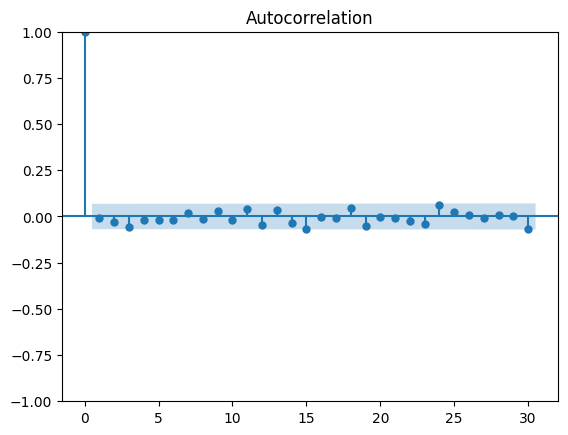

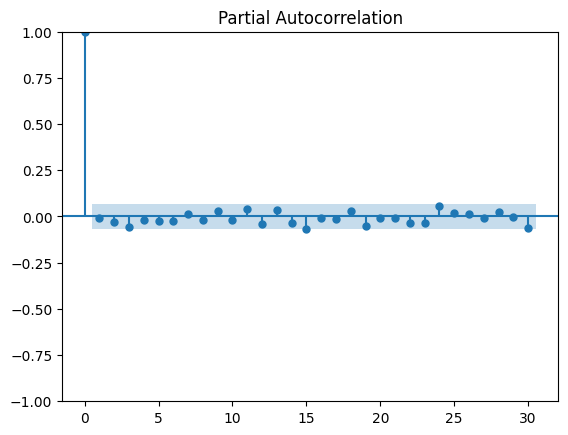

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plot_acf(diff_prices)
plot_pacf(diff_prices)
plt.show()

El gráfico ACF muestra la correlación entre la serie temporal y sus rezagos (lags). En este caso, q=1 El gráfico PACF muestra la correlación entre la serie y sus rezagos, eliminando la influencia de los valores intermedios. En este caso, p=1

### Ajuste del modelo ARIMA

In [ ]:

train = train.asfreq('B')  # 'B' significa día hábil


In [ ]:
# Ajustar el modelo ARIMA
model = ARIMA(train, order=(3, 1, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  677
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1495.002
Date:                Thu, 17 Oct 2024   AIC                           3004.004
Time:                        17:42:44   BIC                           3035.617
Sample:                    07-01-2021   HQIC                          3016.244
                         - 02-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8771      0.094     -9.348      0.000      -1.061      -0.693
ar.L2          0.5574      0.164      3.406      0.001       0.237       0.878
ar.L3          0.8266      0.094      8.828      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Analisis de los residuos

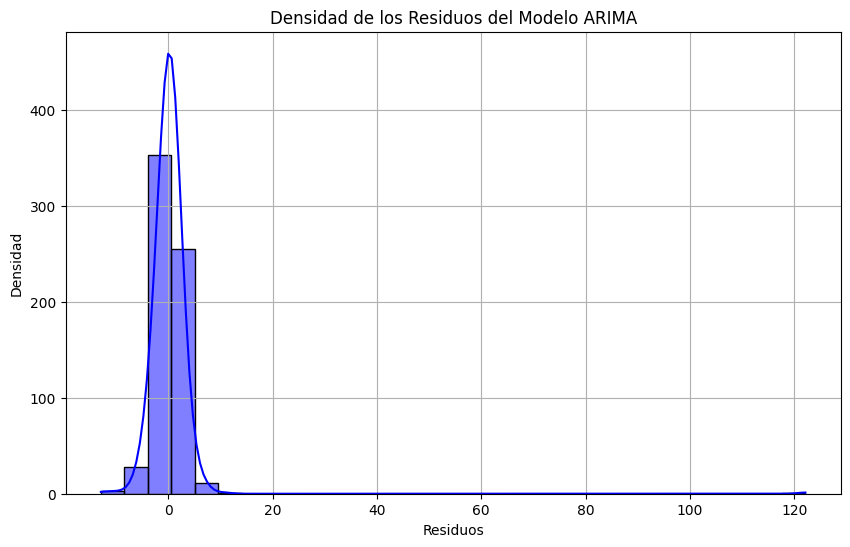

In [ ]:
# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# Graficar la densidad de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Densidad de los Residuos del Modelo ARIMA')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

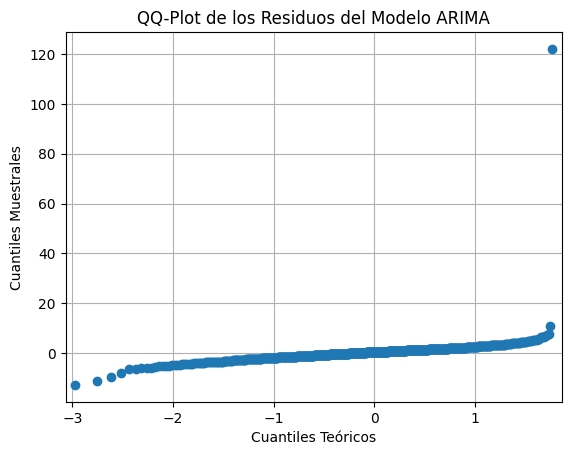

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# QQ-Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot de los Residuos del Modelo ARIMA')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.grid()
plt.show()


Grafico de los valores pedichos vs reales

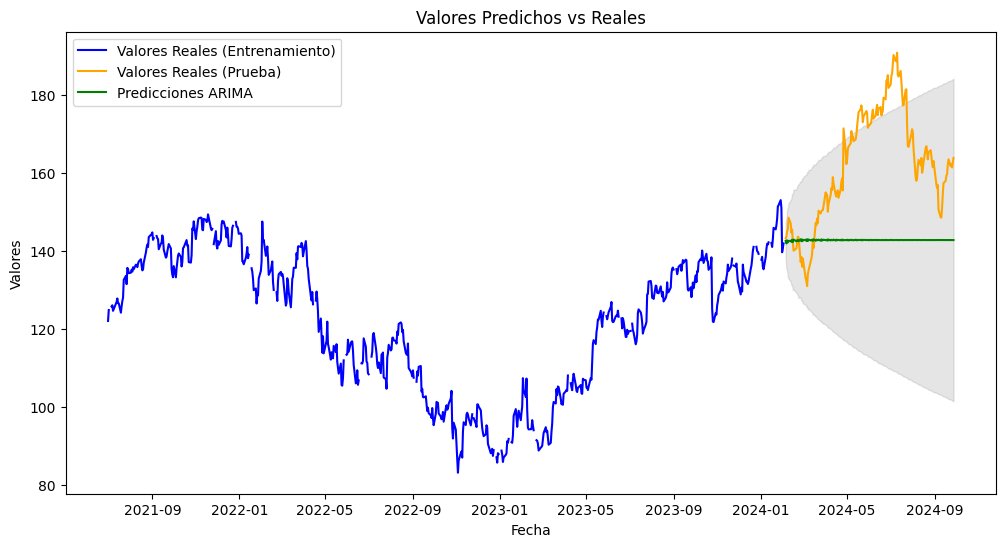

In [ ]:
# Obtener predicciones
# Usar el conjunto de prueba para hacer las predicciones
# Suponiendo que el tamaño de test es conocido
start = len(train)
end = start + len(test) - 1
predictions = model_fit.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Graficar los valores reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Valores Reales (Entrenamiento)', color='blue')
plt.plot(test.index, test, label='Valores Reales (Prueba)', color='orange')
plt.plot(test.index, predicted_mean, label='Predicciones ARIMA', color='green')

# Graficar los intervalos de confianza
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)

# Etiquetas y leyenda
plt.title('Valores Predichos vs Reales')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.legend()
plt.show()

Evaluacion del modelo

In [ ]:
# Realizar predicciones en el conjunto de test
predictions = model_fit.forecast(steps=len(test))

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

RMSE: 23.872241964074387


In [ ]:
rmse / adj_close.mean()

0.18359630232926186

dado que la relacion entre el rmse y la media de precios historicos es 18%, el modelo no es del todo confiable.

# MODELO GARCH

In [ ]:
# Forecast para los próximos 239 pasos
forecast_results = model_fit.get_forecast(steps=239)  # Predicción a 239 pasos
fc = forecast_results.predicted_mean  # Predicciones
conf = forecast_results.conf_int(alpha=0.05)  # Intervalos de confianza al 95%

# Crear las series de pandas para las predicciones y los intervalos de confianza
# Asegúrate de que el índice de forecast tenga el formato correcto
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=239, freq='B')

fc_series = pd.Series(fc.values, index=forecast_index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=forecast_index)


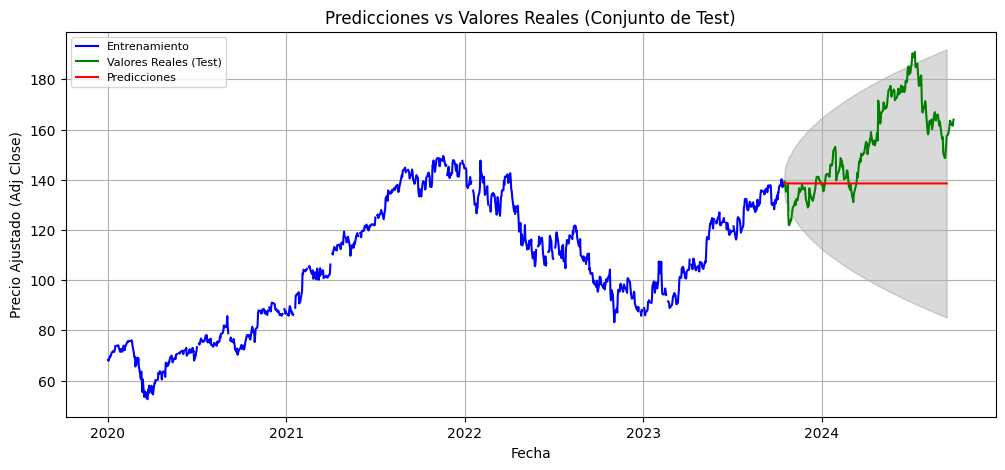

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores reales de entrenamiento y las predicciones
plt.figure(figsize=(12, 5), dpi=100)

# Graficar el conjunto de entrenamiento
plt.plot(train['Adj Close'], label='Entrenamiento', color='blue')

# Graficar los valores reales del conjunto de test
plt.plot(test['Adj Close'], label='Valores Reales (Test)', color='green')

# Graficar las predicciones
plt.plot(fc_series, label='Predicciones', color='red')

# Graficar el intervalo de confianza
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)

# Añadir título y etiquetas
plt.title('Predicciones vs Valores Reales (Conjunto de Test)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado (Adj Close)')
plt.legend(loc='upper left', fontsize=8)

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 40.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

# Ajustar un modelo GARCH
garch_model = arch_model(train['Adj Close'], vol='Garch', p=2, q=2)
garch_fit = garch_model.fit()
print(garch_fit.summary())

ModuleNotFoundError: No module named 'arch'

Iteration:      1,   Func. Count:      8,   Neg. LLF: 35463.154777098825
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5648.582211981973
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4072.0307029465866
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4054.5542568768433
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4067.6458373426567
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4048.0739315389596
Iteration:      7,   Func. Count:     56,   Neg. LLF: 4041.1584233362746
Iteration:      8,   Func. Count:     63,   Neg. LLF: 4039.8694564472344
Iteration:      9,   Func. Count:     70,   Neg. LLF: 4036.4324236720245
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4035.6472711485367
Iteration:     11,   Func. Count:     84,   Neg. LLF: 4035.289419470778
Iteration:     12,   Func. Count:     91,   Neg. LLF: 4035.273936130483
Iteration:     13,   Func. Count:     99,   Neg. LLF: 4035.2172143559997
Iteration:     14,   Func. Count:    106,   Neg. LLF: 

<ipython-input-47-95cb6bc9ce85>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos_estandarizados, color='blue', shade=True)


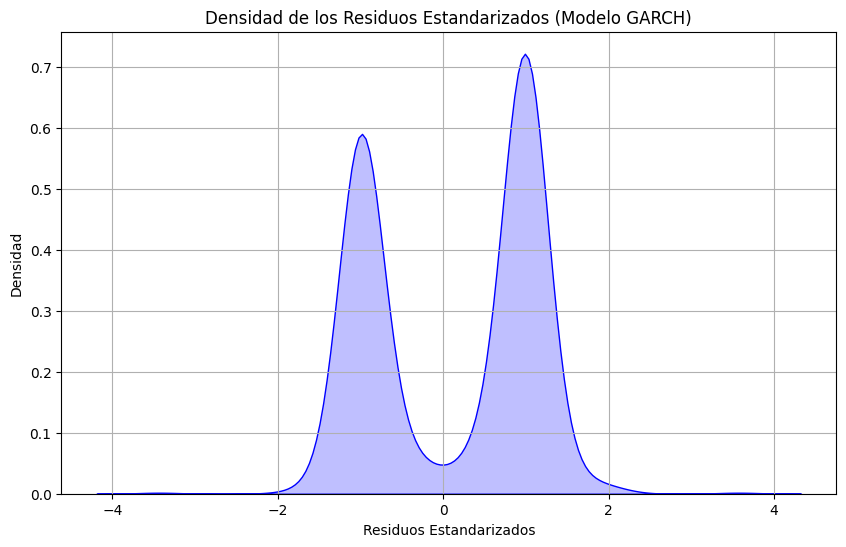

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el modelo GARCH (asumiendo que ya lo has ajustado)
garch_fit = garch_model.fit()

# Obtener los residuos estandarizados
residuos_estandarizados = garch_fit.resid / garch_fit.conditional_volatility

# Graficar la densidad de los residuos estandarizados
plt.figure(figsize=(10, 6))
sns.kdeplot(residuos_estandarizados, color='blue', shade=True)
plt.title('Densidad de los Residuos Estandarizados (Modelo GARCH)')
plt.xlabel('Residuos Estandarizados')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 35463.154777098825
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5648.582211981973
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4072.0307029465866
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4054.5542568768433
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4067.6458373426567
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4048.0739315389596
Iteration:      7,   Func. Count:     56,   Neg. LLF: 4041.1584233362746
Iteration:      8,   Func. Count:     63,   Neg. LLF: 4039.8694564472344
Iteration:      9,   Func. Count:     70,   Neg. LLF: 4036.4324236720245
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4035.6472711485367
Iteration:     11,   Func. Count:     84,   Neg. LLF: 4035.289419470778
Iteration:     12,   Func. Count:     91,   Neg. LLF: 4035.273936130483
Iteration:     13,   Func. Count:     99,   Neg. LLF: 4035.2172143559997
Iteration:     14,   Func. Count:    106,   Neg. LLF: 

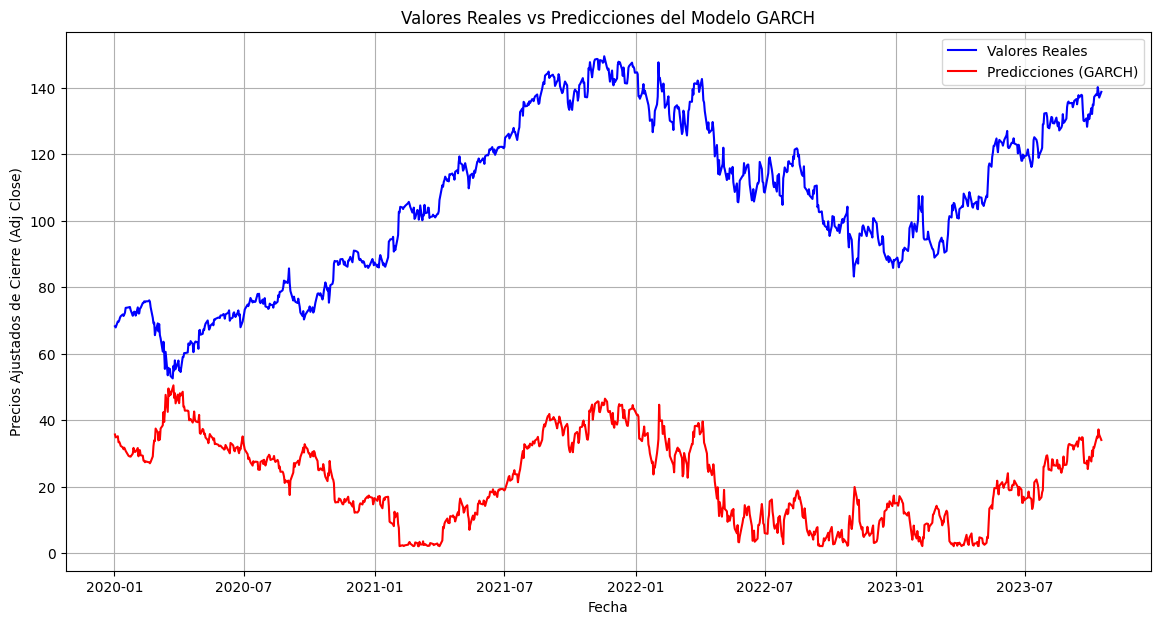

In [ ]:
import matplotlib.pyplot as plt

# Ajustar el modelo GARCH (suponiendo que ya has ajustado el modelo)
garch_fit = garch_model.fit()

# Obtener los valores predichos (retornos condicionales) del modelo GARCH
predicted_volatility = garch_fit.conditional_volatility

# Graficar los valores reales vs los predichos
plt.figure(figsize=(14, 7))

# Graficar los valores reales
plt.plot(train.index, train['Adj Close'], label='Valores Reales', color='blue')

# Graficar los valores predichos por el modelo GARCH
plt.plot(train.index, predicted_volatility, label='Predicciones (GARCH)', color='red')

# Añadir título y etiquetas
plt.title('Valores Reales vs Predicciones del Modelo GARCH')
plt.xlabel('Fecha')
plt.ylabel('Precios Ajustados de Cierre (Adj Close)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

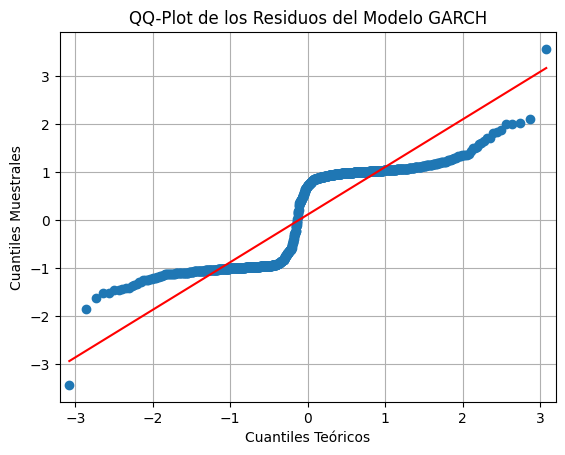

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Supongamos que 'garch_fit' es tu modelo GARCH ajustado
residuals = garch_fit.resid / garch_fit.conditional_volatility  # Residuos estandarizados

# QQ-Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot de los Residuos del Modelo GARCH')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.grid()
plt.show()


Basados en el QQ plot, el modelo GARCH no es apropiado, siendo el ARIMA mas adecuado

# Modelo SVR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = yf.download('GOOGL', start='2020-07-01', end='2024-10-22')
df.to_csv('GOOGL.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,70.958504,72.424004,70.709000,72.099998,71.921906,42182000
2020-07-02,72.592003,74.426003,72.553497,73.496498,73.314964,57218000
2020-07-06,74.407501,75.500000,73.848999,74.982498,74.797287,44712000
2020-07-07,74.806503,76.066002,74.485001,74.496002,74.311989,42364000
2020-07-08,75.040001,75.558502,74.614998,75.180000,74.994308,31766000


In [ ]:
forecast_days = 30
df = df[['Close']]
df['Prediction'] = df[['Close']].shift(-forecast_days) #  está creando una nueva columna llamada 'Prediction' en el DataFrame df, que contiene los valores de la columna 'Close', pero desplazados hacia arriba por un número de filas equivalente a forecast_days.

<ipython-input-79-275e4abcf324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days) #  está creando una nueva columna llamada 'Prediction' en el DataFrame df, que contiene los valores de la columna 'Close', pero desplazados hacia arriba por un número de filas equivalente a forecast_days.


In [ ]:
X = np.array(df.drop('Prediction', axis=1))
X = X[:-forecast_days] #  Corta de las variables predictoras los ultimos 30 dias
y = np.array(df['Prediction'])
y = y[:-forecast_days] # los toma

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8500033063654434


In [ ]:
# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test)

# Supongamos que 'forecast_days' es el número de días que deseas pronosticar
# Necesitas construir el conjunto de características para el pronóstico
X_forecast = X[-forecast_days:]  # Las últimas filas de X para el pronóstico
y_forecast = model.predict(X_forecast)  # Predicciones para los días pronosticados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test)

# Supongamos que 'forecast_days' es el número de días que deseas pronosticar
X_forecast = X[-forecast_days:]  # Las últimas filas de X para el pronóstico
y_forecast = model.predict(X_forecast)  # Predicciones para los días pronosticados

# Fechas correspondientes
dates_test = df.index[-len(y_test):]  # Las fechas para el conjunto de prueba
dates_forecast = df.index[-forecast_days:]  # Las fechas para el pronóstico


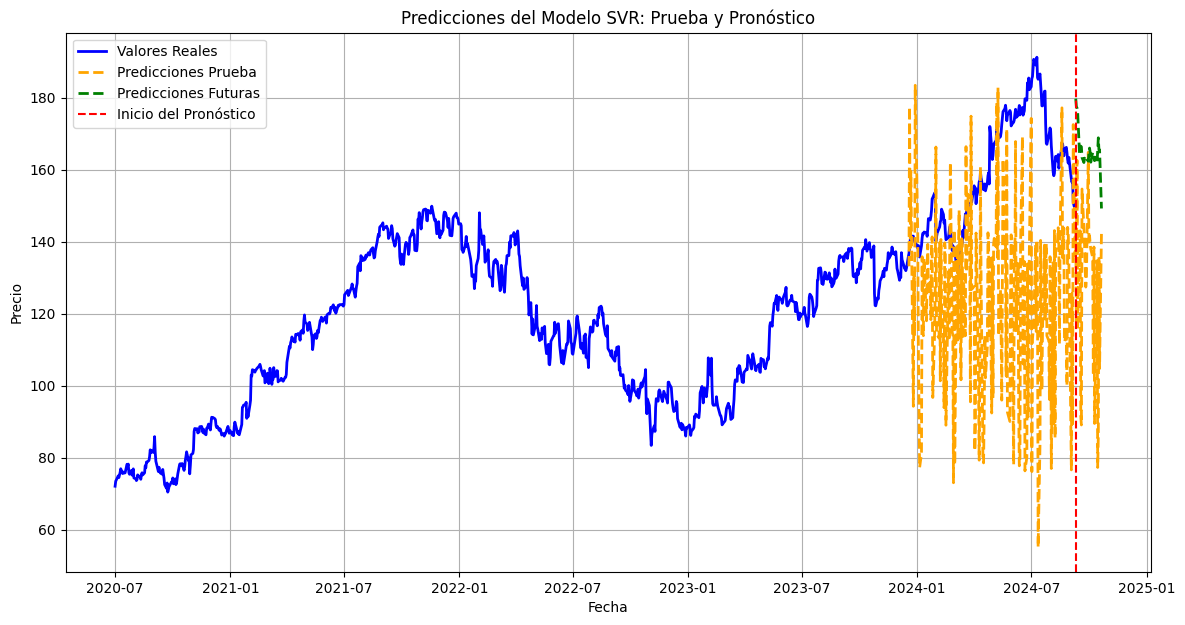

In [ ]:
plt.figure(figsize=(14, 7))

# Graficar valores reales (Close)
plt.plot(df.index[:-forecast_days], df['Close'][:-forecast_days], label='Valores Reales', color='blue', linewidth=2)

# Graficar predicciones del conjunto de prueba
plt.plot(dates_test, y_pred_test, label='Predicciones Prueba', color='orange', linestyle='--', linewidth=2)

# Graficar predicciones futuras
plt.plot(dates_forecast, y_forecast, label='Predicciones Futuras', color='green', linestyle='--', linewidth=2)

# Agregar títulos y etiquetas
plt.title('Predicciones del Modelo SVR: Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.axvline(x=df.index[-forecast_days], color='red', linestyle='--', label='Inicio del Pronóstico')  # Línea vertical para indicar el inicio del pronóstico
plt.legend()
plt.grid()
plt.show()


Conclusiones

Luego de probar diversos modelos, no hemos encontrado ninguno que prediga los precios futuros de una forma aceptable para utilizar los modelos en decisiones de trading o mitigacion de riesgos basados en las perspectivas futuras de los precios. De todas formas, podemos ver una tendencia ascendente de los precios en el largo plazo, propio de las acciones en la bolsa a lo largo de la historia. Ademas, vemos que el comportamiento no es homogeneo a pesar de estar relacionado con sus valores pasados.
Dado que la intencion del modelo es predecir los precios de la manera mas acertada posible para realizar operaciones en la bolsa, el proximo paso podria ser la utilizacion de redes neuronales que ademas de considerar la autocorrelacion serial (como los modelos ARIMA), podriamos ir moviendonos en el tiempo, lo que pareceria mas acorde al comportamiento dinamico de los precios. No obstante, lo modelos presentados podrian ser utlizados de base y optimizados.